# The goal is to predict the likelihood of a song reaching the Top 10 once it enters the Top 200. This is condensed into a classification problem 


## Task 1: Binary Classification using on song-specific features 
The focus will be on the song-specific numeric features such as Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, and Valence

In [1]:
"""
An analysis to predit hit songs based on spotify data
"""
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the spotify data 
spotify_data = pd.read_csv("Spotify_Dataset_V3.csv", delimiter=";")

In [3]:
#Checking to see if the data is downloaded correctly
spotify_data.describe()

,Rank,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total),Points (Ind for each Artist/Nat)
count,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000
mean,100.407782,0.697730,0.652049,-5295.645217,0.109946,0.230694,0.007647,0.523134,100.592218,72.391141
std,57.406664,0.133186,0.155684,2785.261321,0.096841,0.230710,0.054724,0.223926,57.406664,54.227892
min,1.000000,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,1.000000,0.200000
25%,51.000000,0.617000,0.549000,-6825.000000,0.045000,0.048000,0.000000,0.356000,51.000000,28.000000
50%,100.000000,0.719000,0.671000,-5206.000000,0.068000,0.152000,0.000000,0.521000,101.000000,60.000000
75%,150.000000,0.793000,0.771000,-3885.000000,0.136000,0.349000,0.000000,0.696000,150.000000,104.000000
max,200.000000,0.985000,0.996000,1509.000000,0.966000,0.994000,0.956000,0.982000,200.000000,200.000000


In [4]:
# Data includes 20 song features for top 200 songs between 01/01/2017 and 05/31/2023
# In total, there is 651,936 songs
spotify_data.shape

(651936, 20)

In [5]:
spotify_data.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


Based on the goal to identify the hitsongs, the highest-ever rank of a song achieved in the Top 200 list will be utilised for the analysis and other occurrences will be removed

In [6]:
# There about 7457 unique songs in our datasets 
spotify_data['Title'].value_counts()

Title
Sunflower - Spider-Man: Into the Spider-Verse    3262
One Dance                                        2970
Something Just Like This                         2602
Closer                                           2532
Shallow                                          2518
                                                 ... 
305                                                 1
acting like that (feat. Machine Gun Kelly)          1
Always Been You                                     1
Call My Friends                                     1
Only                                                1
Name: count, Length: 7457, dtype: int64

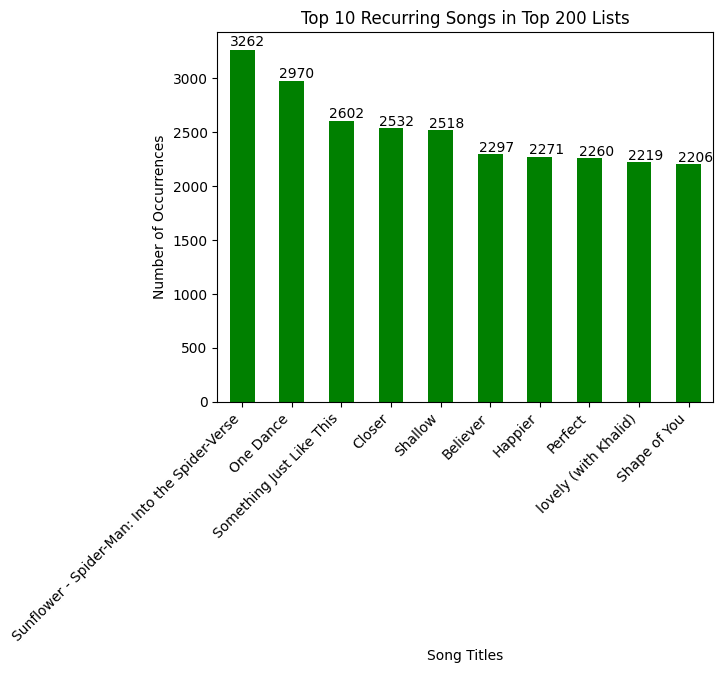

In [7]:
# Top 10 songs
top_songs = spotify_data['Title'].value_counts()[:10]

# Create the bar plot
ax = top_songs.plot.bar(color='green')

# Set the title and labels
plt.title('Top 10 Recurring Songs in Top 200 Lists')
plt.xlabel('Song Titles')
plt.ylabel('Number of Occurrences')

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45, ha="right")

# Add the text on the top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

# Show the plot
plt.show()


Data cleaning: Removal of Non-numeric song features as part of Task 1. The goal is focusing on \{ Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, Valence\} these are then correlated with the points for each song

The other features such as artist, nationality and continent might have an effect on a song's rank. However, they will be ignored for the Task 1. In simple terms, the task checks on the ability of the song to enter top 10 after entering top 200 based on song features alone regardless of Artist's star power

In [8]:
song_data = spotify_data.copy()
song_data.drop(columns=['Rank', 'Artists', 'Date', '# of Artist', 'Artist (Ind.)', '# of Nationality', 'Nationality', 'Continent', 'Points (Ind for each Artist/Nat)', 'id', 'Song URL'], inplace=True)


In [9]:
#Verifying that columns have been dropped
song_data.head()

,Title,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total)
0,Ella Baila Sola,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,200
1,Ella Baila Sola,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,200
2,WHERE SHE GOES,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,199
3,La Bebe - Remix,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,198
4,La Bebe - Remix,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,198


In [10]:
song_data.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total)
count,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000
mean,0.697730,0.652049,-5295.645217,0.109946,0.230694,0.007647,0.523134,100.592218
std,0.133186,0.155684,2785.261321,0.096841,0.230710,0.054724,0.223926,57.406664
min,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,1.000000
25%,0.617000,0.549000,-6825.000000,0.045000,0.048000,0.000000,0.356000,51.000000
50%,0.719000,0.671000,-5206.000000,0.068000,0.152000,0.000000,0.521000,101.000000
75%,0.793000,0.771000,-3885.000000,0.136000,0.349000,0.000000,0.696000,150.000000
max,0.985000,0.996000,1509.000000,0.966000,0.994000,0.956000,0.982000,200.000000


Sorting songs in descending order to pick only the highest points a song ever achieved. The goal is to predict if the song will be a hitsong or not, which we are interested in the song's highest possible position

In [11]:
#sort based on total points in decesinding order ahead of removing duplication
song_data.sort_values(by='Points (Total)', ascending=False, inplace=True) 
song_data.head(10)

,Title,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total)
0,Ella Baila Sola,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,200
72825,"Quevedo: Bzrp Music Sessions, Vol. 52",0.621,0.782,-5548.0,0.044,0.013,0.033,0.550,200
557165,rockstar,0.577,0.522,-6594.0,0.098,0.130,0.000,0.119,200
557259,All I Want for Christmas Is You,0.336,0.627,-7463.0,0.038,0.164,0.000,0.350,200
73375,"Quevedo: Bzrp Music Sessions, Vol. 52",0.621,0.782,-5548.0,0.044,0.013,0.033,0.550,200
73374,"Quevedo: Bzrp Music Sessions, Vol. 52",0.621,0.782,-5548.0,0.044,0.013,0.033,0.550,200
557532,All I Want for Christmas Is You,0.336,0.627,-7463.0,0.038,0.164,0.000,0.350,200
73101,"Quevedo: Bzrp Music Sessions, Vol. 52",0.621,0.782,-5548.0,0.044,0.013,0.033,0.550,200
73100,"Quevedo: Bzrp Music Sessions, Vol. 52",0.621,0.782,-5548.0,0.044,0.013,0.033,0.550,200
557823,All I Want for Christmas Is You,0.336,0.627,-7463.0,0.038,0.164,0.000,0.350,200


In [12]:
#drop duplicates starting from top to remain with the highest ranking song occurence
song_data.drop_duplicates(subset=['Title'], keep='first', inplace=True) 
print(song_data['Title'].value_counts())

Title
Ella Baila Sola                                           1
TG4M                                                      1
Deep End (Lil Baby & Gun)                                 1
Be Honest                                                 1
Î¨. PASSION                                               1
                                                         ..
Oprah's Bank Account (Lil Yachty & DaBaby feat. Drake)    1
SugarCrash!                                               1
COOLER THAN A BITCH (feat. Roddy Ricch)                   1
Evoque Prata                                              1
113                                                       1
Name: count, Length: 7457, dtype: int64


In [13]:
#There are 7457 unique songs, each with an occurence of 1
print(song_data['Title'].shape)

(7457,)


### Exploratory Data Analysis

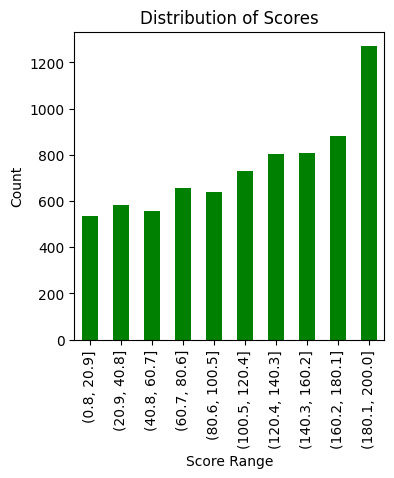

In [14]:
# Plotting Song distribution per Score to understand the patterns of the data

# Score distribution
score_distribution = song_data['Points (Total)'].value_counts(bins=10).sort_index()

# Plotting
plt.figure(figsize=(4, 4))
score_distribution.plot.bar(rot=90, color='green')

# Set title and labels
plt.title('Distribution of Scores')
plt.xlabel('Score Range')
plt.ylabel('Count')

# Display the plot
plt.show()


In [15]:
# Create a DataFrame 'hist' from the value counts of 'Points (Total)'
hist = song_data['Points (Total)'].value_counts().reset_index()
hist

# Rename the columns for clarity
hist.columns = ['Points_Total', 'Count']

# Display the cleaned DataFrame
hist

,Points_Total,Count
0,200,98
1,199,96
2,198,78
3,197,76
4,196,67
...,...,...
195,57,21
196,64,20
197,87,17
198,28,16


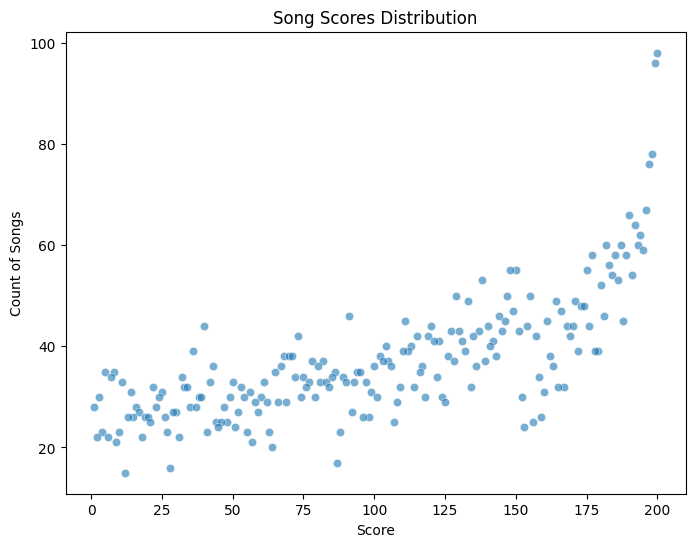

In [16]:
# Plotting for hist
plt.figure(figsize=(8, 6)) 
plt.scatter(hist['Points_Total'], hist['Count'], alpha=0.6, edgecolors='w', linewidth=0.5) 
plt.title('Song Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Count of Songs')
plt.show()


The song data features have different ranges and might impact prediction thus all song features were standardized

In [17]:
# Create a scaler object
scaler = StandardScaler()

# List of columns you want to standardize
columns_to_standardize = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']

# Standardize the data
song_data[columns_to_standardize] = scaler.fit_transform(song_data[columns_to_standardize])

# Display the first 10 rows to check
song_data.head(10)

,Title,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total)
0,Ella Baila Sola,-0.054834,0.711402,0.205562,-0.821968,1.006627,-0.167749,1.529822,200
72825,"Quevedo: Bzrp Music Sessions, Vol. 52",-0.371950,0.852011,0.087762,-0.730712,-0.889769,0.220344,0.276158,200
557165,rockstar,-0.668825,-0.671249,-0.243473,-0.282729,-0.417688,-0.167749,-1.626409,200
557259,All I Want for Christmas Is You,-2.294887,-0.056086,-0.518658,-0.780488,-0.280502,-0.167749,-0.606704,200
72556,Shut Down,0.957238,0.313011,0.223612,-0.722416,-0.930118,-0.167749,0.885333,200
73477,As It Was,-1.053412,0.553218,0.154262,-0.631160,0.437708,-0.155989,0.770561,200
68746,Unholy (feat. Kim Petras),0.255535,-0.964183,-0.490791,-0.382281,-0.889769,-0.167749,-1.101106,200
548560,God's Plan,0.552409,-1.104792,-1.145028,-0.241249,-0.817141,-0.167749,-0.505175,200
80558,Pink Venom,0.822295,0.354022,-0.416058,-0.357393,-0.861525,-0.167749,1.136948,200
550037,Hava (feat. Young Thug),0.599639,-0.665390,0.472514,-0.846856,-0.199804,-0.167749,-0.412474,200


In [18]:
#display the summary statistics of the feautures
song_data.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total)
count,7.457000e+03,7.457000e+03,7.457000e+03,7.457000e+03,7.457000e+03,7.457000e+03,7.457000e+03,7457.000000
mean,-3.982927e-16,1.181538e-16,1.524565e-17,8.385109e-17,9.719104e-17,1.619851e-17,-4.230669e-16,114.833043
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,58.545889
min,-4.069388e+00,-3.700191e+00,-9.072503e+00,-9.132238e-01,-9.422228e-01,-1.677494e-01,-2.036940e+00,1.000000
25%,-6.283417e-01,-6.126616e-01,-5.031415e-01,-7.224161e-01,-7.808274e-01,-1.677494e-01,-7.788619e-01,67.000000
50%,1.205918e-01,9.038110e-02,2.347792e-02,-4.403525e-01,-3.813738e-01,-1.677494e-01,-1.518636e-02,121.000000
75%,7.345824e-01,7.289782e-01,5.120972e-01,4.722059e-01,4.780568e-01,-1.677494e-01,7.661464e-01,168.000000
max,2.084012e+00,2.105770e+00,2.322490e+00,6.918187e+00,3.068453e+00,1.107520e+01,2.165482e+00,200.000000


The song features are assessed on their correlation with the target feature (Points)

In [19]:
#Correlation through the corr method 
song_data.iloc[:,1:].corr()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total)
Danceability,1.000000,0.123265,0.154898,0.190301,-0.260359,-0.102387,0.325056,0.011761
Energy,0.123265,1.000000,0.561950,0.000408,-0.525369,-0.064713,0.372493,-0.049511
Loudness,0.154898,0.561950,1.000000,-0.045864,-0.352728,-0.116692,0.218325,-0.014816
Speechiness,0.190301,0.000408,-0.045864,1.000000,-0.071372,-0.068506,0.036540,-0.036594
Acousticness,-0.260359,-0.525369,-0.352728,-0.071372,1.000000,0.068841,-0.082005,0.025576
Instrumentalness,-0.102387,-0.064713,-0.116692,-0.068506,0.068841,1.000000,-0.100301,-0.011530
Valence,0.325056,0.372493,0.218325,0.036540,-0.082005,-0.100301,1.000000,-0.026675
Points (Total),0.011761,-0.049511,-0.014816,-0.036594,0.025576,-0.011530,-0.026675,1.000000


Pearson correlation to understand feature linear relation

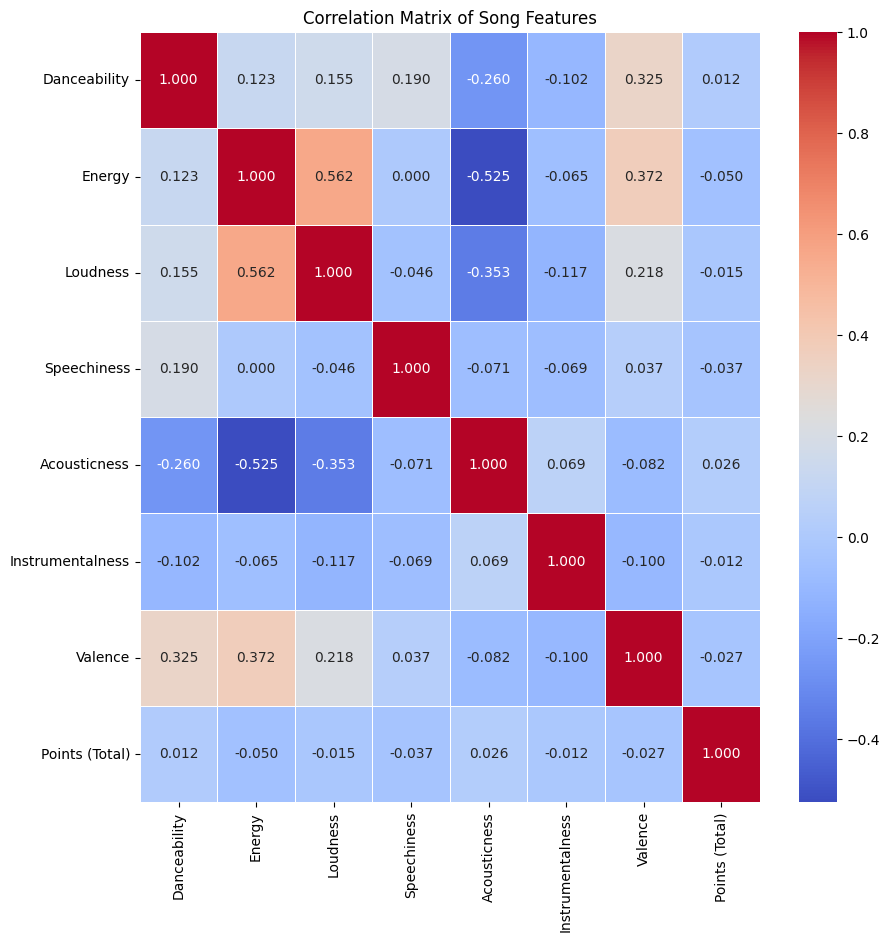

In [20]:
# Set the size of the figure for the heatmap
plt.figure(figsize=(10, 10))

# Calculate the correlation matrix for the selected columns of song_data
correlation_matrix = song_data.iloc[:, 1:9].corr(method='pearson')

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt='.3f', cmap='coolwarm')
plt.title('Correlation Matrix of Song Features')

# Show the plot
plt.show()

Spearman correlation between features and also Points (Totals)

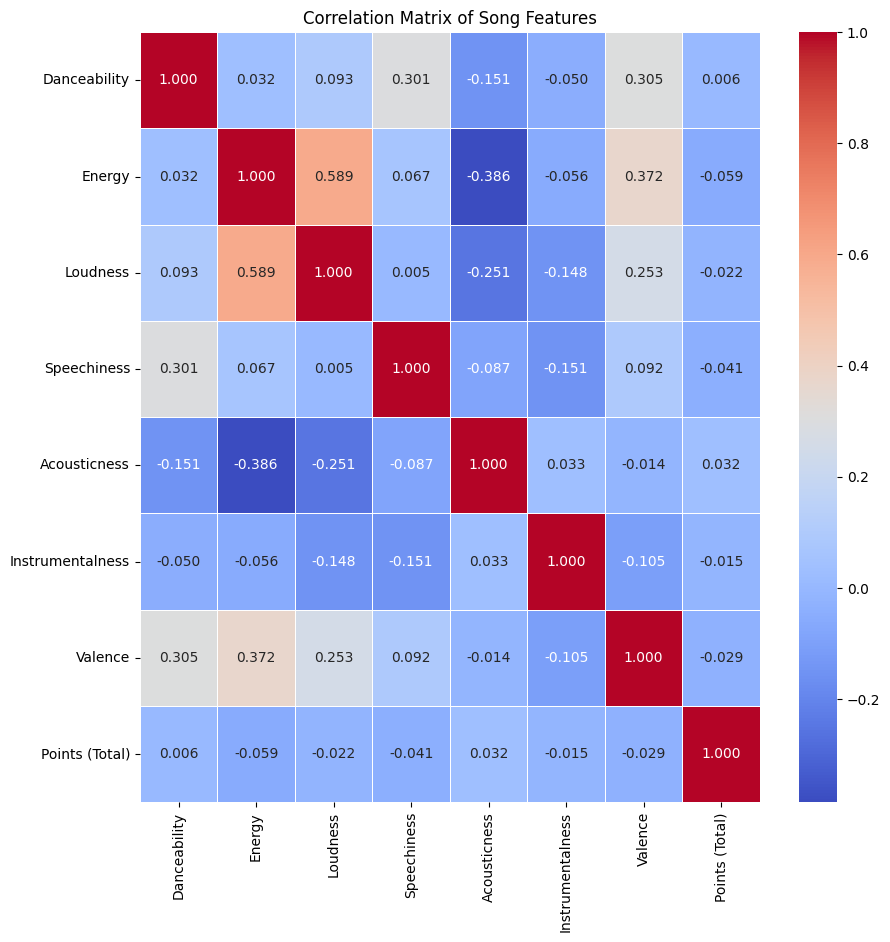

In [21]:
# Set the size of the figure for the heatmap
plt.figure(figsize=(10, 10))

# Calculate the correlation matrix for the selected columns of song_data
correlation_matrix = song_data.iloc[:, 1:9].corr(method='spearman')

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt='.3f', cmap='coolwarm')
plt.title('Correlation Matrix of Song Features')

# Show the plot
plt.show()

Converting the the data to be conducive for a binary classification problem

In [22]:
# Create a copy of song_data and reset its index
song_data_binary = song_data.copy().reset_index(drop=True)

# Convert 'Points (Total)' to binary values: 1 if Points >= 191 (top 10), else 0
# Adjust the threshold as necessary to match your top 10 criteria
song_data_binary['Points (Total)'] = np.where(song_data_binary['Points (Total)'] >= 191, 1, 0)

# Display the modified DataFrame
song_data_binary

,Title,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total)
0,Ella Baila Sola,-0.054834,0.711402,0.205562,-0.821968,1.006627,-0.167749,1.529822,1
1,"Quevedo: Bzrp Music Sessions, Vol. 52",-0.371950,0.852011,0.087762,-0.730712,-0.889769,0.220344,0.276158,1
2,rockstar,-0.668825,-0.671249,-0.243473,-0.282729,-0.417688,-0.167749,-1.626409,1
3,All I Want for Christmas Is You,-2.294887,-0.056086,-0.518658,-0.780488,-0.280502,-0.167749,-0.606704,1
4,Shut Down,0.957238,0.313011,0.223612,-0.722416,-0.930118,-0.167749,0.885333,1
...,...,...,...,...,...,...,...,...,...
7452,100,0.626628,-1.063781,0.040261,0.190142,1.293104,-0.167749,-0.858319,0
7453,Skinny Love,-0.574365,-2.212084,-2.608036,-0.697528,2.434976,-0.167749,-1.674967,0
7454,Hood,1.335079,-1.180954,1.841886,2.239251,-0.833281,-0.167749,0.536602,0
7455,Be My Mistake,-0.702560,-2.821387,-2.716970,-0.813672,2.426906,-0.167749,-1.732353,0


/var/folders/qx/r1vdfbdj7x9_ld0c3l08nvl40000gn/T/ipykernel_84788/611341325.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Never in T10', 'Achieved T10'])


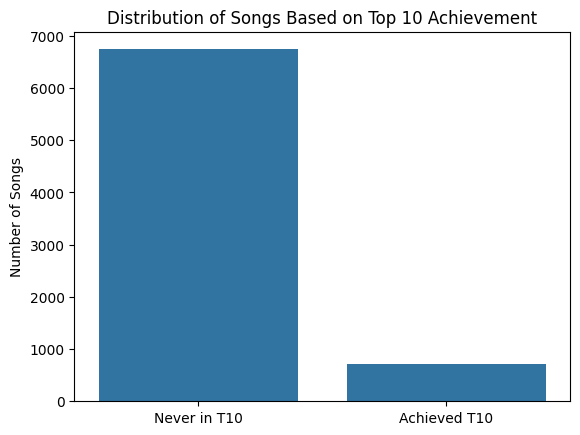

In [23]:
# Create the countplot
ax = sns.countplot(data=song_data_binary, x='Points (Total)')

# Set custom labels for the x-ticks
ax.set_xticklabels(['Never in T10', 'Achieved T10'])

# Remove the x-label as it's not needed due to descriptive x-tick labels
plt.xlabel('')

# Set a more descriptive y-label
plt.ylabel('Number of Songs')

# Add a title for better readability and context
plt.title('Distribution of Songs Based on Top 10 Achievement')

# Display the plot
plt.show()

### Dimensionality Reduction Analysis: Principal Component Analysis on the data

In [24]:
#feature variables and target variable separation 
X = song_data_binary.drop(columns=['Title', 'Points (Total)'])
Y = song_data_binary['Points (Total)'].values

In [25]:
# 2D PCA visual analysis on feature variables
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# confirmation that feature variables have been reduced to 2D
X_2d.shape

(7457, 2)

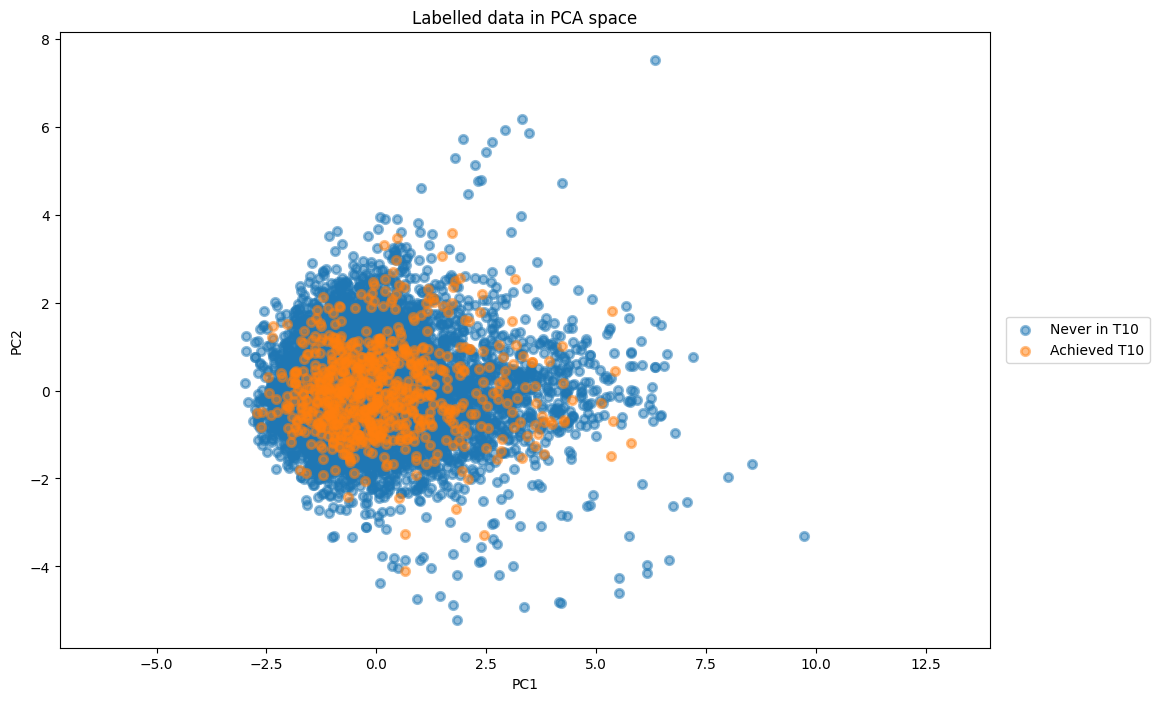

In [26]:
#set the labels for visualization
categories = ['Never in T10', 'Achieved T10']
labels = [0,1]

# Plotting
fig = plt.figure(figsize=(12,8))
for label, cat in zip(labels, categories):
      plt.scatter(X_2d[Y == label, 0], X_2d[Y == label, 1], alpha=.5, lw=2, label=cat)
plt.axis('equal')
plt.legend(loc='center left', scatterpoints=1, bbox_to_anchor=[1.01, 0.5])
plt.title('Labelled data in PCA space')
plt.xlabel('PC1')
plt.ylabel('PC2')
top_plot = plt.gca()
plt.show()

Based on the visualization above, its difficult to separate the categories in 2D through an eye test. Therefore, an iteration of the analysis will be repeated on 3D

In [27]:
# 3D PCA visual analysis on feature variables
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X)

# confirmation that feature variables have been reduced to 3D
X_3d.shape

(7457, 3)

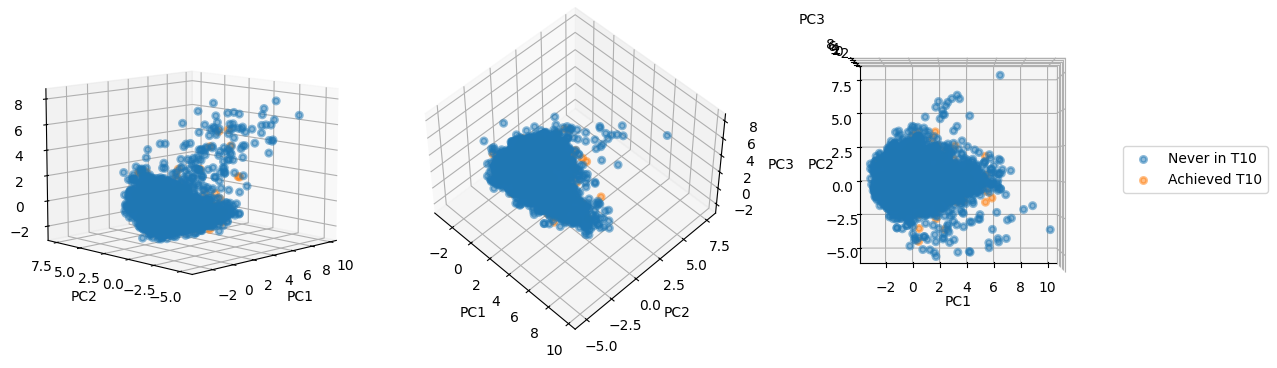

In [28]:
fig1 = plt.figure(figsize=(14,10))
ax = fig1.add_subplot(1,3,1, projection="3d")
ax1 = fig1.add_subplot(1,3,2, projection="3d")
ax2 = fig1.add_subplot(1,3,3, projection="3d")
#plt.title('Labelled data in PCA space')


for label, cat in zip(labels, categories):
      ax.scatter(X_3d[Y == label, 0], X_3d[Y == label, 1], X_3d[Y == label, 2], alpha=.5, lw=2, label=cat,)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
top_plot = plt.gca()
ax.view_init(elev=10, azim=-135, roll=0)

for label, cat in zip(labels, categories):
      ax1.scatter(X_3d[Y == label, 0], X_3d[Y == label, 1], X_3d[Y == label, 2], alpha=.5, lw=2, label=cat,)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
top_plot = plt.gca()
ax1.view_init(elev=50, azim=-45, roll=0)

for label, cat in zip(labels, categories):
      ax2.scatter(X_3d[Y == label, 0], X_3d[Y == label, 1], X_3d[Y == label, 2], alpha=.5, lw=2, label=cat,)
plt.legend(loc='center left', scatterpoints=1, bbox_to_anchor=[1.01, 0.5])
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
top_plot = plt.gca()
ax2.view_init(elev=90, azim=-90, roll=0)

plt.show()


Even in the 3D space using an eye test, its still hard to distinguish the data. It shows that the data can not be projected into lower dimensions as the 3D and 2D plot show us that the Top 10 songs are encased by the others

### Data Separation

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, log_loss
from sklearn.model_selection import train_test_split


In [30]:

#Separating the data on basis of 70-30 split 
Train, Test = train_test_split(song_data_binary, train_size = 0.7, test_size=0.3, random_state=0)

#Separating the dependent variables and the target
X_Train = Train.drop(columns = ["Title","Points (Total)"])
X_Test = Test.drop(columns = ["Title", "Points (Total)"])
Y_Train = Train["Points (Total)"]
Y_Test = Test["Points (Total)"]


An analysis of the training data, we recognize that we have a class imbalance that should be addressed through a resampling approach. Majority of the data in the training dataset has not entered in the top 10 which creates a class imbalance as the  models developed will be more inclined towards the Non-top 10 songs 

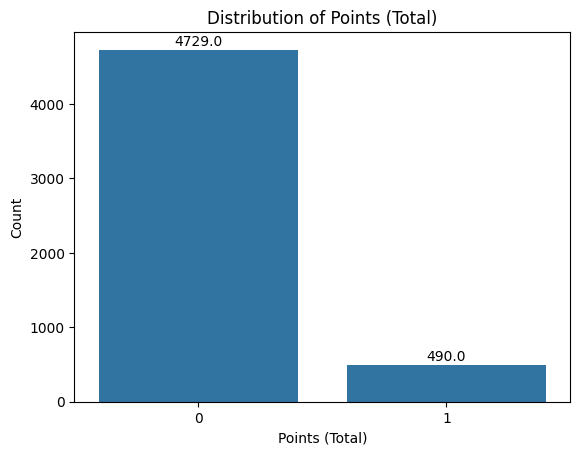

In [31]:

# Create the countplot
ax = sns.countplot(x=Y_Train)

# Set the title and labels
ax.set_title('Distribution of Points (Total)')
ax.set_xlabel('Points (Total)')
ax.set_ylabel('Count')

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0,6), textcoords='offset points')

# Show the plot
plt.show()


## Classification models 

For this analysis, we will use the logistic regression, decision tree classifier, and random forest. We will begin with analysing the performance on the models without addressing the class imbalance problem and then focus on addressing the class imbalance problem using different techniques 

In [32]:
# We first create a confusion matrix that will aid us in analysing each model's perfomance

def plot_confusion_matrix(cm, classes=None, title='Normalized Confusion Matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


### 1. Logistic Regression

In [33]:
log_reg = LogisticRegression(solver='lbfgs', class_weight='balanced')
log_reg.fit(X_Train,Y_Train)

LogisticRegression(class_weight='balanced')

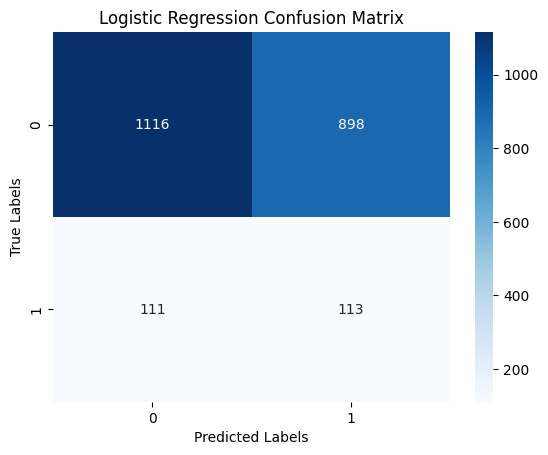

In [34]:
Y_pred_log_reg = log_reg.predict(X_Test)
cm_log_reg = confusion_matrix(Y_Test, Y_pred_log_reg)

# Logistic Regression Confusion Matrix
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [35]:
print('Classification accuracy on test set: {:.3f}'.format(log_reg.score(X_Test, Y_Test)))

Classification accuracy on test set: 0.549


### 2. Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

#fitting a decision tree classifier 
dec_tree = DecisionTreeClassifier(criterion='entropy', random_state=0, class_weight='balanced')
dec_tree.fit(X_Train, Y_Train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=0)

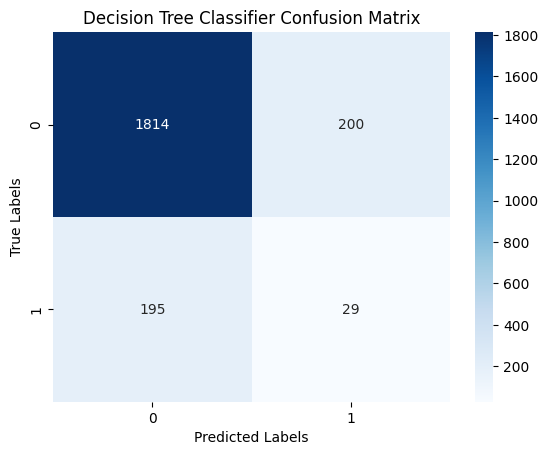

In [37]:
Y_pred_dec_tree = dec_tree.predict(X_Test)
cm_dec_tree = confusion_matrix(Y_Test, Y_pred_dec_tree)

# Logistic Regression Confusion Matrix
sns.heatmap(cm_dec_tree, annot=True, fmt="d", cmap='Blues')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [38]:
print('Classification accuracy on test set: {:.3f}'.format(dec_tree.score(X_Test, Y_Test)))

Classification accuracy on test set: 0.824


In [39]:
#Understanding the feature importance of the decision tree
column_names = X_Train.columns
for i, column in enumerate(column_names):
    if dec_tree.feature_importances_[i] > 0:
        print('Importance of feature {}: {:.3f}'.format(column, dec_tree.feature_importances_[i]))

Importance of feature Danceability: 0.135
Importance of feature Energy: 0.160
Importance of feature Loudness: 0.167
Importance of feature Speechiness: 0.162
Importance of feature Acousticness: 0.129
Importance of feature Instrumentalness: 0.029
Importance of feature Valence: 0.218


### 3. Random forest classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)
rf.fit(X_Train, Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

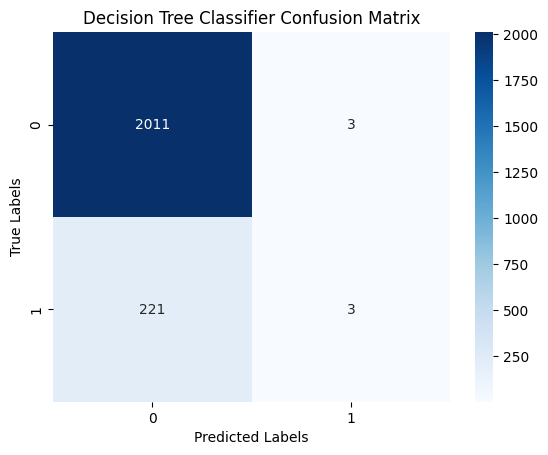

In [41]:
Y_pred_rf = rf.predict(X_Test)
cm_rf = confusion_matrix(Y_Test, Y_pred_rf)

# Random forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [42]:
print('Classification accuracy on test set: {:.3f}'.format(rf.score(X_Test, Y_Test)))

Classification accuracy on test set: 0.900


In [43]:
#Understanding the feature importance of the decision tree
column_names = X_Train.columns
for i, column in enumerate(column_names):
    if rf.feature_importances_[i] > 0:
        print('Importance of feature {}: {:.3f}'.format(column, rf.feature_importances_[i]))

Importance of feature Danceability: 0.160
Importance of feature Energy: 0.168
Importance of feature Loudness: 0.169
Importance of feature Speechiness: 0.150
Importance of feature Acousticness: 0.155
Importance of feature Instrumentalness: 0.031
Importance of feature Valence: 0.167


Based on our initial analysis we can see that the performance of the Decision tree classifier and Random Forest is high, but this is not accurate as they models simply focus on predicting everything as the majority since our dataset has a class imbalance. 

To illustrate this, we will use a different accurancy measurement specifically F1 score and AUC

In [44]:
from sklearn.metrics import f1_score

#Calculate the f1 score for classifiers

print('Logistic Regression Classification F1 score : {:.3f}'.format(f1_score(Y_Test,Y_pred_log_reg)))
print('Decision Tree Classification F1 score: {:.3f}'.format(f1_score(Y_Test,Y_pred_dec_tree)))
print('Random Forest Classification F1 score: {:.3f}'.format(f1_score(Y_Test,Y_pred_rf)))

Logistic Regression Classification F1 score : 0.183
Decision Tree Classification F1 score: 0.128
Random Forest Classification F1 score: 0.026


In [45]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for the test data
# Get the probabiliites of the positive class which is of interest 
Y_probs_log_reg = log_reg.predict_proba(X_Test)[:,1]
Y_probs_dec_tree = dec_tree.predict_proba(X_Test)[:,1]
Y_probs_rf = rf.predict_proba(X_Test)[:,1]

# Calculate AUC for random forest 
auc_log_reg = roc_auc_score(Y_Test, Y_probs_log_reg)
auc_dec_tree = roc_auc_score(Y_Test, Y_probs_dec_tree)
auc_rf = roc_auc_score(Y_Test, Y_probs_rf)

#Plotting the results 
print(f'Logistic regression AUC: {auc_log_reg}')
print(f'Decision Tree classifier AUC: {auc_dec_tree}')
print(f'Random Forest AUC: {auc_rf}')

Logistic regression AUC: 0.5542275500070931
Decision Tree classifier AUC: 0.5148890800113491
Random Forest AUC: 0.5864118580649738


In [46]:
from sklearn.metrics import recall_score

# Calculate AUC for random forest 
recall_log_reg = recall_score(Y_Test, Y_pred_log_reg)
recall_dec_tree = recall_score(Y_Test, Y_pred_dec_tree)
recall_rf = recall_score(Y_Test, Y_pred_rf)

#Plotting the results 
print(f'Logistic regression Recall: {recall_log_reg}')
print(f'Decision Tree classifier Recall: {recall_dec_tree}')
print(f'Random Forest Recall: {recall_rf}')

Logistic regression Recall: 0.5044642857142857
Decision Tree classifier Recall: 0.12946428571428573
Random Forest Recall: 0.013392857142857142


Using the above metrics, all the 3 classifiers are not performing well with low values in AUC, Recall and F1 score. For this analysis, the hit song class is of high interest and a model that can accurately predict hit songs is of interest thus we would rate models based on their positive predictive power (i.e., Recall). 

With the Logistic regression, it shows that the model can accurately predict hit songs 50% of the time, compared to Random forest (13%) and Decision Tree Classifier (12%)

This trend can be attributed to the class imbalance that existed during the training of our models. Thus, the class imbalance will be addressed on the following stages

## Addressing Class Imbalance through 
### A. Resampling technique using Upsampling

In [50]:
#Spilt the training data into majority and minority class 
majority = Train[Train["Points (Total)"] == 0]
minority = Train[Train["Points (Total)"] == 1]

print(f'The majority class is {majority.shape[0]}')
print(f'The minority class is {minority.shape[0]} ')

The majority class is 4729
The minority class is 490 


In [55]:
from sklearn.utils import resample

# Upsampling the minority class
minority_upsampled = resample(minority,
                              replace=True,               # Sample with replacement
                              n_samples=len(majority),    # Match number in majority class
                              random_state=0)           

# Combine majority class with upsampled minority class
Train_upsampled = pd.concat([majority, minority_upsampled])
Train_upsampled


,Title,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total)
1511,Hear Me Now,0.754824,-1.210248,-0.611759,-0.747304,1.224511,-0.132468,-0.116715,0
2014,2step,0.586145,0.143109,0.073828,-0.631160,-0.260327,-0.167749,0.638131,0
5111,IDK You Yet,-0.317973,-1.936725,-1.871465,-0.747304,2.624616,0.749562,-1.308579,0
4688,I Got A Shot,2.003046,-1.192672,-0.246957,-0.357393,-0.627502,-0.167749,1.966839,0
3976,It's Beginning To Look A Lot Like Christmas,-1.431252,-2.212084,-1.066811,-0.780488,2.564093,-0.167749,0.192286,0
...,...,...,...,...,...,...,...,...,...
169,Jail,-1.471735,-0.384173,-0.289390,-0.307617,1.216441,-0.167749,0.435073,1
711,Supalonely,1.260860,-0.032651,0.359780,-0.656048,0.288417,-0.167749,1.454779,1
672,Adan y Eva,0.613134,0.424326,1.843222,1.691716,0.361045,-0.167749,1.026591,1
529,shut up,-1.195102,-1.022770,0.163762,-0.838560,2.289720,-0.167749,0.492459,1


In [63]:
#Confirmation of the upsampling 
print(f'The majority class is {Train_upsampled[Train_upsampled["Points (Total)"]==0].shape[0]}')
print(f'The minority class is {Train_upsampled[Train_upsampled["Points (Total)"]==1].shape[0]} ')

The majority class is 4729
The minority class is 4729 


In [65]:
#Separating the dependent variables and the target for upsampled data
X_Train_ups = Train_upsampled.drop(columns = ["Title","Points (Total)"])
Y_Train_ups = Train_upsampled["Points (Total)"]


### 1. Logisitic Regression

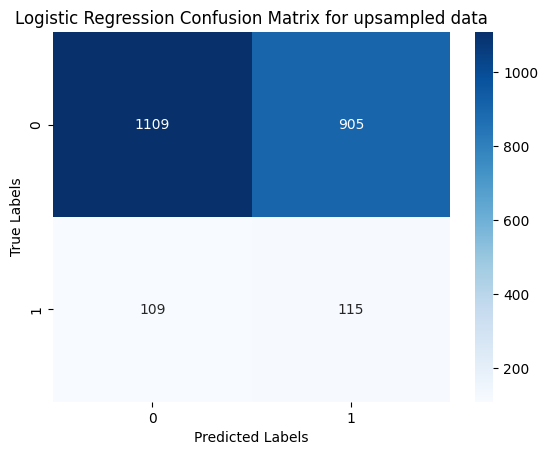

In [66]:
#Training the model
log_reg_ups = LogisticRegression(solver='lbfgs', class_weight='balanced')
log_reg_ups.fit(X_Train_ups,Y_Train_ups)

Y_pred_log_reg_ups = log_reg_ups.predict(X_Test)
cm_log_reg_ups = confusion_matrix(Y_Test, Y_pred_log_reg_ups)

# Logistic Regression Confusion Matrix
sns.heatmap(cm_log_reg_ups, annot=True, fmt="d", cmap='Blues')
plt.title('Logistic Regression Confusion Matrix for upsampled data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [67]:
print('Classification accuracy on test set after upsampling: {:.3f}'.format(log_reg_ups.score(X_Test, Y_Test)))

Classification accuracy on test set after upsampling: 0.547


### 2. Decision tree Classifier



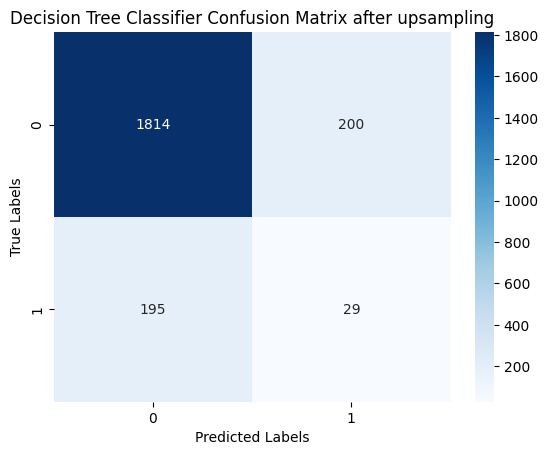

In [79]:
#fitting a decision tree classifier 
dec_tree_ups = DecisionTreeClassifier(criterion='entropy', random_state=0, class_weight='balanced')
dec_tree_ups.fit(X_Train_ups, Y_Train_ups)

Y_pred_dec_tree_ups = dec_tree.predict(X_Test)
cm_dec_tree_ups = confusion_matrix(Y_Test, Y_pred_dec_tree_ups)

# Logistic Regression Confusion Matrix
sns.heatmap(cm_dec_tree_ups, annot=True, fmt="d", cmap='Blues')
plt.title('Decision Tree Classifier Confusion Matrix after upsampling')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

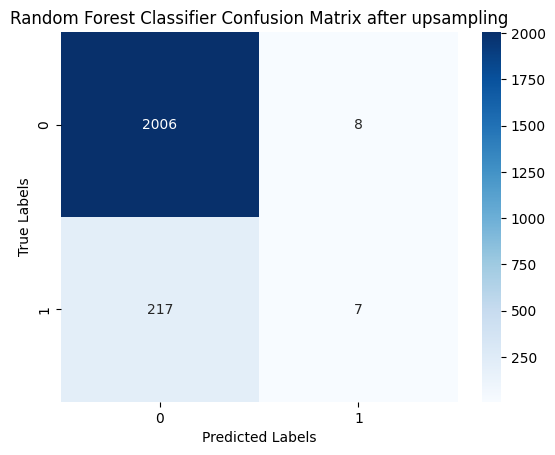

In [81]:
rf_ups = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0, class_weight='balanced')
rf_ups.fit(X_Train_ups, Y_Train_ups)

Y_pred_rf_ups = rf_ups.predict(X_Test)
cm_rf_ups = confusion_matrix(Y_Test, Y_pred_rf_ups)

# Random Forest Confusion Matrix after upsampling
sns.heatmap(cm_rf_ups, annot=True, fmt="d", cmap='Blues')
plt.title('Random Forest Classifier Confusion Matrix after upsampling')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [71]:
#Calculate the f1 score for classifiers

print('Logistic Regression Classification F1 score : {:.3f}'.format(f1_score(Y_Test,Y_pred_log_reg_ups)))
print('Decision Tree Classification F1 score: {:.3f}'.format(f1_score(Y_Test,Y_pred_dec_tree_ups)))
print('Random Forest Classification F1 score: {:.3f}'.format(f1_score(Y_Test,Y_pred_rf_ups)))

Logistic Regression Classification F1 score : 0.185
Decision Tree Classification F1 score: 0.128
Random Forest Classification F1 score: 0.059


In [72]:
# Predict probabilities for the test data
# Get the probabiliites of the positive class which is of interest 
Y_probs_log_reg_ups = log_reg_ups.predict_proba(X_Test)[:,1]
Y_probs_dec_tree_ups = dec_tree_ups.predict_proba(X_Test)[:,1]
Y_probs_rf_ups = rf_ups.predict_proba(X_Test)[:,1]

# Calculate AUC for random forest 
auc_log_reg_ups = roc_auc_score(Y_Test, Y_probs_log_reg_ups)
auc_dec_tree_ups = roc_auc_score(Y_Test, Y_probs_dec_tree_ups)
auc_rf_ups = roc_auc_score(Y_Test, Y_probs_rf_ups)

#Plotting the results 
print(f'Logistic regression AUC: {auc_log_reg_ups}')
print(f'Decision Tree classifier AUC: {auc_dec_tree_ups}')
print(f'Random Forest AUC: {auc_rf_ups}')

Logistic regression AUC: 0.5551895658958718
Decision Tree classifier AUC: 0.5238331678252235
Random Forest AUC: 0.579885001418641


In [74]:
# Calculate AUC for random forest 
recall_log_reg_ups = recall_score(Y_Test, Y_pred_log_reg_ups)
recall_dec_tree_ups = recall_score(Y_Test, Y_pred_dec_tree_ups)
recall_rf_ups= recall_score(Y_Test, Y_pred_rf_ups)

#Plotting the results 
print(f'Logistic regression Recall: {recall_log_reg_ups}')
print(f'Decision Tree classifier Recall: {recall_dec_tree_ups}')
print(f'Random Forest Recall: {recall_rf_ups}')

Logistic regression Recall: 0.5133928571428571
Decision Tree classifier Recall: 0.12946428571428573
Random Forest Recall: 0.03125


Upscaling had a low impact on improvement of the predictive power of the models. The next stage of the analysis will look into more advanced class imbalance techniques such as SMOTE 

Its my hypothesis that its hard to determine if a song will be in the Top 10 after entering the Top 200 based on song features only. Analysis indicates that for a song to enter the top 10, other factors outside specific song features, such as the artist's fame, the influence of the music label, and the marketing efforts behind a track, significantly contribute to its success. 

Additionally, different musical genres also have different song features, thus variability in overall hit song classification. We hypothesise that the model's perfomance could improve if the songs were clustered base on genre and time period to capture the trends and evolution of musical taste. For example songs during 2020's Covid period would be different from 2022 hit songs.'